In [31]:
import os, sys
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
file = '../../20191204_peptide_aptamer_pairs.csv'

## General metrics about the file

In [15]:
# Generate a dictionary from peptide --> [(aptamer, read count)]
all_aptamers = []
dataset = {}
with open(file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
        else:
            peptide = row[0]
            aptamer = row[1]
            rc = row[2]
            
            # Reformat the peptide
            if '_' in peptide:
                split = peptide.split('_')
                save = split[0]
                if len(save) < 8:
                    continue
                peptide = save 
            if len(peptide) < 8:
                continue
            
            if peptide not in dataset.keys():
                dataset[peptide] = []
            dataset[peptide].append((aptamer, rc))
            all_aptamers.append(aptamer)
        line_count += 1
    print("Number of lines: ", line_count)

Column names are Peptide, Aptamer, Read Count
Number of lines:  595072


489899
Count of 3:  400
Count of 4:  5494
Count of 5:  15168
Count of 6:  15915
Count of 7:  15150
Count of 8:  437772


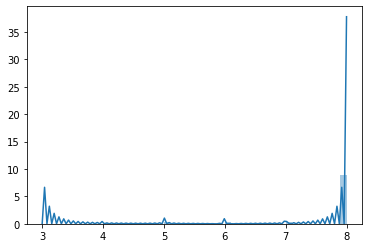

In [10]:
print(str(len(dataset.keys())))
peptides = list(dataset.keys())
lengths = [len(p) for p in peptides]
sns.distplot(lengths, hist=True, norm_hist=True)
print("Count of 3: ", lengths.count(3))
print("Count of 4: ", lengths.count(4))
print("Count of 5: ", lengths.count(5))
print("Count of 6: ", lengths.count(6))
print("Count of 7: ", lengths.count(7))
print("Count of 8: ", lengths.count(8))

## Split the dataset into binding affinity groups

Affinity Groups:  [24449, 41890, 129699, 399033]


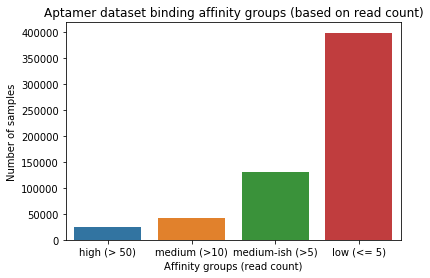

In [14]:
affinity_groups = [0, 0, 0, 0]
x = ['high (> 50)', 'medium (>10)', 'medium-ish (>5)', 'low (<= 5)']
for peptide in dataset:
    for a, r in dataset[peptide]:
        r = int(r)
        if r > 50:
            affinity_groups[0] += 1
        elif r > 10:
            affinity_groups[1] += 1
        elif r > 5:
            affinity_groups[2] += 1
        else:
            affinity_groups[3] += 1

print("Affinity Groups: ", affinity_groups)          
plt.title("Aptamer dataset binding affinity groups (based on read count)")
plt.xlabel("Affinity groups (read count)")
plt.ylabel("Number of samples")
sns.barplot(x, affinity_groups)

## Write the dataset into a json file

In [ ]:
# Dictionary should be aptamer --> [(peptide, aff), ...., ]
aptamer_dataset = {}
with open(file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
        else:
            peptide = row[0]
            aptamer = row[1]
            rc = row[2]
            
            # Reformat the peptide
            if '_' in peptide:
                split = peptide.split('_')
                save = split[0]
                if len(save) < 3:
                    continue
                peptide = save 
            if aptamer not in aptamer_dataset.keys():
                aptamer_dataset[aptamer] = []
            
            aptamer_dataset[aptamer].append((peptide, rc))
        line_count +=1

with open('aptamer_dataset.json', 'w') as f:
    json.dump(aptamer_dataset, f)
    print("Wrote to dataset file")

## Test to see if the datasets are uniform

In [29]:
# Reduce the peptides to only peptides with 8 AA
all_peptides = [p for p in peptides if len(p) > 7]
all_aptamers = [a for a in all_aptamers if len(a) == 40]

count = 0
for a in all_aptamers:
    if len(a) < 40:
        count += 1
print("Count of aptamers that are not 40 N long: ", count)

print(len(all_peptides))
print(len(set(all_peptides)))
print(len(all_aptamers))
print(len(set(all_aptamers)))

Count of aptamers that are not 40 N long:  0
437772
437772
594900
557824
